In [31]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pyspark.sql import SQLContext
import json
sqlContext = SQLContext(sc)

/usr/local/software/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

In [2]:
reviews_file = '/homes/jiaweihe/others/spark-1.5.2-bin-hadoop2.6/data/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json'
reviews = sqlContext.read.json(reviews_file)
reviews.first()

Row(_corrupt_record=None, business_id=u'vcNAWiLM4dR7D2nwwJ7nCA', date=u'2007-05-17', review_id=u'15SdjuK7DmYqUAj6rjGowg', stars=5, text=u"dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank.", type=u'review', user_id=u'Xqd0DzHaiyRqVH3WRG7hzg', votes=Row(cool=1, funny=0, useful=2))

In [ ]:
business_file = '/homes/jiaweihe/others/spark-1.5.2-bin-hadoop2.6/data/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json'
business_text = sc.textFile(business_file)
business_json = business_text.map(lambda x: json.loads(x))
categories_count = business_json.flatMap(lambda x: x['categories']).map(lambda x: (str(x),1)).reduceByKey(lambda x,y: x+y)
categories_count_sorted = categories_count.sortBy(lambda x: x[1], ascending=False)
categories_counted = pd.DataFrame(categories_count_sorted.collect(), columns=["category", "frequency"])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8));
categories_counted['frequency'][:30].plot(kind="bar")
ax.set_xticklabels(categories_counted['category'][:30]);

In [3]:
business_file = '/homes/jiaweihe/others/spark-1.5.2-bin-hadoop2.6/data/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json'
business = sqlContext.read.json(business_file)
business.first()

Row(attributes=Row(Accepts Credit Cards=None, Accepts Insurance=None, Ages Allowed=None, Alcohol=None, Ambience=None, Attire=None, BYOB=None, BYOB/Corkage=None, By Appointment Only=True, Caters=None, Coat Check=None, Corkage=None, Delivery=None, Dietary Restrictions=None, Dogs Allowed=None, Drive-Thru=None, Good For=None, Good For Dancing=None, Good For Groups=None, Good For Kids=None, Good for Kids=None, Hair Types Specialized In=None, Happy Hour=None, Has TV=None, Music=None, Noise Level=None, Open 24 Hours=None, Order at Counter=None, Outdoor Seating=None, Parking=None, Payment Types=None, Price Range=None, Smoking=None, Take-out=None, Takes Reservations=None, Waiter Service=None, Wheelchair Accessible=None, Wi-Fi=None), business_id=u'vcNAWiLM4dR7D2nwwJ7nCA', categories=[u'Doctors', u'Health & Medical'], city=u'Phoenix', full_address=u'4840 E Indian School Rd\nSte 101\nPhoenix, AZ 85018', hours=Row(Friday=Row(close=u'17:00', open=u'08:00'), Monday=Row(close=u'17:00', open=u'08:00'),

In [5]:
business_file = '/homes/jiaweihe/others/spark-1.5.2-bin-hadoop2.6/data/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json'
business_text = sc.textFile(business_file)
business_text.first()

u'{"business_id": "vcNAWiLM4dR7D2nwwJ7nCA", "full_address": "4840 E Indian School Rd\\nSte 101\\nPhoenix, AZ 85018", "hours": {"Tuesday": {"close": "17:00", "open": "08:00"}, "Friday": {"close": "17:00", "open": "08:00"}, "Monday": {"close": "17:00", "open": "08:00"}, "Wednesday": {"close": "17:00", "open": "08:00"}, "Thursday": {"close": "17:00", "open": "08:00"}}, "open": true, "categories": ["Doctors", "Health & Medical"], "city": "Phoenix", "review_count": 9, "name": "Eric Goldberg, MD", "neighborhoods": [], "longitude": -111.98375799999999, "state": "AZ", "stars": 3.5, "latitude": 33.499313000000001, "attributes": {"By Appointment Only": true}, "type": "business"}'

In [3]:
import json

In [6]:
business_json = business_text.map(lambda x: json.loads(x))

In [7]:
business_json.first()

{u'attributes': {u'By Appointment Only': True},
 u'business_id': u'vcNAWiLM4dR7D2nwwJ7nCA',
 u'categories': [u'Doctors', u'Health & Medical'],
 u'city': u'Phoenix',
 u'full_address': u'4840 E Indian School Rd\nSte 101\nPhoenix, AZ 85018',
 u'hours': {u'Friday': {u'close': u'17:00', u'open': u'08:00'},
  u'Monday': {u'close': u'17:00', u'open': u'08:00'},
  u'Thursday': {u'close': u'17:00', u'open': u'08:00'},
  u'Tuesday': {u'close': u'17:00', u'open': u'08:00'},
  u'Wednesday': {u'close': u'17:00', u'open': u'08:00'}},
 u'latitude': 33.499313,
 u'longitude': -111.983758,
 u'name': u'Eric Goldberg, MD',
 u'neighborhoods': [],
 u'open': True,
 u'review_count': 9,
 u'stars': 3.5,
 u'state': u'AZ',
 u'type': u'business'}

In [8]:
categories_count = business_json.flatMap(lambda x: x['categories']).map(lambda x: (str(x),1)).reduceByKey(lambda x,y: x+y)

In [9]:
categories_count.take(5)

[('Drugstores', 561),
 ('Buffets', 420),
 ('Endodontists', 26),
 ('Canadian (New)', 183),
 ('Teppanyaki', 2)]

In [10]:
categories_count_sorted = categories_count.sortBy(lambda x: x[1], ascending=False)

In [11]:
categories_count_sorted.take(10)

[('Restaurants', 21892),
 ('Shopping', 8919),
 ('Food', 7862),
 ('Beauty & Spas', 4738),
 ('Nightlife', 4340),
 ('Bars', 3628),
 ('Health & Medical', 3213),
 ('Automotive', 2965),
 ('Home Services', 2853),
 ('Fashion', 2566)]

In [12]:
import pandas as pd
categories_counted = pd.DataFrame(categories_count_sorted.collect(), columns=["category", "counts"])
categories_counted[:10]

,category,counts
0,Restaurants,21892
1,Shopping,8919
2,Food,7862
3,Beauty & Spas,4738
4,Nightlife,4340
5,Bars,3628
6,Health & Medical,3213
7,Automotive,2965
8,Home Services,2853
9,Fashion,2566


In [13]:
categories_counted[:20]

,category,counts
0,Restaurants,21892
1,Shopping,8919
2,Food,7862
3,Beauty & Spas,4738
4,Nightlife,4340
5,Bars,3628
6,Health & Medical,3213
7,Automotive,2965
8,Home Services,2853
9,Fashion,2566


In [15]:
import matplotlib.pyplot as plt

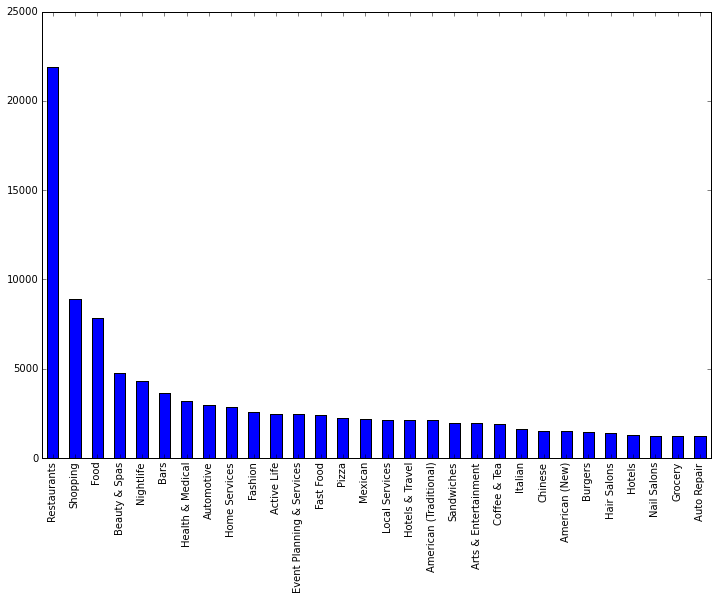

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8));
categories_counted['counts'][:30].plot(kind="bar")
ax.set_xticklabels(categories_counted['category'][:30]);